In [6]:
import gym
from policy_gradient import PolicyGradient
import matplotlib.pyplot as plt

In [7]:
DISPLAY_REWARD_THRESHOLD = 500  # renders environment if total episode reward is greater then this threshold
RENDER = False  # rendering wastes time

In [8]:
env = gym.make('CartPole-v0')
env = env.unwrapped

In [9]:
RL = PolicyGradient(n_actions=env.action_space.n, n_features=env.observation_space.shape[0], learning_rate=0.02, reward_decay=0.99)

episode: 0  reward: 9


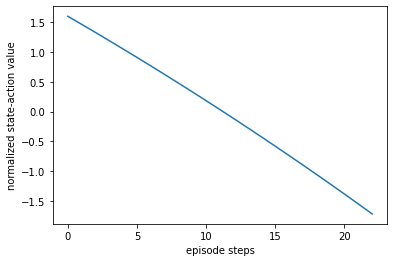

episode: 1  reward: 9
episode: 2  reward: 9
episode: 3  reward: 9
episode: 4  reward: 9
episode: 5  reward: 10
episode: 6  reward: 10
episode: 7  reward: 10
episode: 8  reward: 10
episode: 9  reward: 11
episode: 10  reward: 11
episode: 11  reward: 12
episode: 12  reward: 12
episode: 13  reward: 12
episode: 14  reward: 12
episode: 15  reward: 12
episode: 16  reward: 13
episode: 17  reward: 13
episode: 18  reward: 13
episode: 19  reward: 13
episode: 20  reward: 14
episode: 21  reward: 14
episode: 22  reward: 15
episode: 23  reward: 16
episode: 24  reward: 16
episode: 25  reward: 16
episode: 26  reward: 17
episode: 27  reward: 17
episode: 28  reward: 18
episode: 29  reward: 18
episode: 30  reward: 18
episode: 31  reward: 19
episode: 32  reward: 19
episode: 33  reward: 19
episode: 34  reward: 20
episode: 35  reward: 20
episode: 36  reward: 20
episode: 37  reward: 20
episode: 38  reward: 21
episode: 39  reward: 22
episode: 40  reward: 22
episode: 41  reward: 24
episode: 42  reward: 24
episo

In [10]:
for i_episode in range(500):
	observation = env.reset()

	while True:
		if RENDER: env.render()

		action = RL.choose_action(observation)
		observation_, reward, done, info = env.step(action)
		RL.store_transition(observation, action, reward)

		if done:
			ep_rs_sum = sum(RL.ep_rs)

			if 'running_reward' not in globals():
				running_reward = ep_rs_sum
			else:
				running_reward = running_reward * 0.99 + ep_rs_sum * 0.01

			if running_reward > DISPLAY_REWARD_THRESHOLD: RENDER = True # rendering
			print("episode:", i_episode, " reward:", int(running_reward))

			vt = RL.learn()

			if i_episode == 0:
				plt.plot(vt)
				plt.xlabel('episode steps')
				plt.ylabel('normalized state-action value')
				plt.show()
			break

		observation = observation_
